In [1]:
cd /Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/3D printing

/Users/Liangqiaohao/Desktop/PV Lab/2020/March/Learning project/3D printing


In [2]:
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import GPyOpt

import os

import matplotlib as mpl
import matplotlib.tri as tri

import ternary
import pickle
import datetime

from collections import Counter
import matplotlib.ticker as ticker


In [3]:
x_LCB = np.load('BO_LCB_master.npy', allow_pickle = True)
x_EI = np.load('BO_EI_master.npy', allow_pickle = True)
x_MPI = np.load('BO_MPI_master.npy', allow_pickle = True)
x_RS = np.load('RS_master.npy', allow_pickle = True)

# x_LCB = np.load('XGB_BO_LCB_master.npy', allow_pickle = True)
# x_EI = np.load('XGB_BO_EI_master.npy', allow_pickle = True)
# x_MPI = np.load('XGB_BO_MPI_master.npy', allow_pickle = True)
# x_RS = np.load('XGB_RS_master.npy', allow_pickle = True)

In [4]:
def average_run(x):
#     rows
    n_runs = len(x)
#     columns
    n_eval = len(x[0])
    
    mean_ = [None for i in np.arange(n_eval)]
    std_ = [None for i in np.arange(n_eval)]
    median_ = [None for i in np.arange(n_eval)]
    six_ = [None for i in np.arange(n_eval)]
    nintyfour_ = [None for i in np.arange(n_eval)]
    

    
    for i in np.arange(n_eval):
        i_column = []
        for j in np.arange(n_runs):
            i_column.append(x[j][i])
        
        i_column = np.array(i_column)
        mean_[i] = np.mean(i_column)
        median_[i] = np.median(i_column)
        std_[i] = np.std(i_column)
        six_[i] = np.quantile(i_column, 0.25, out=None, overwrite_input=False, interpolation='linear')
        nintyfour_[i] = np.quantile(i_column, 0.75, out=None, overwrite_input=False, interpolation='linear')
        
        
    return np.array(mean_), np.array(std_), np.array(median_), np.array(six_), np.array(nintyfour_)

        
        
    

In [5]:
# [X_collection, run_collection, loss_collection]
k_LCB = average_run(x_LCB[2])
k_EI = average_run(x_EI[2])
k_MPI = average_run(x_MPI[2])
k_RS = average_run(x_RS[2])
# k_grid = average_run(x_grid[2])

Text(0.5, 0, 'n_eval')

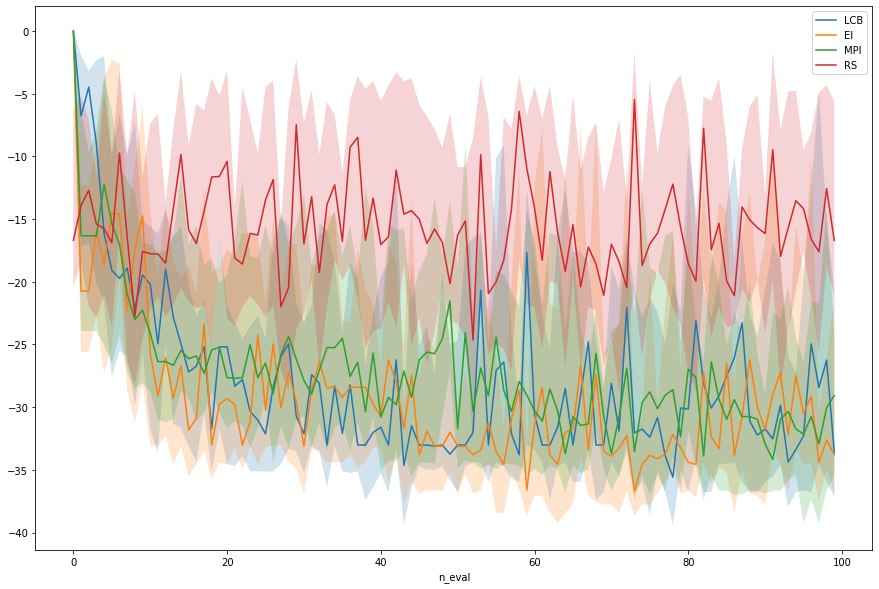

In [7]:
fig = plt.figure(figsize=(15,10))
ax0 = fig.add_subplot(111)

ax0.plot(k_LCB[2], label = 'LCB')
ax0.fill_between(np.arange(len(k_LCB[2])), k_LCB[3], k_LCB[4], alpha=0.2)
ax0.plot(k_EI[2], label = 'EI')
ax0.fill_between(np.arange(len(k_EI[2])), k_EI[3], k_EI[4], alpha=0.2)
ax0.plot(k_MPI[2], label = 'MPI')
ax0.fill_between(np.arange(len(k_MPI[2])), k_MPI[3], k_MPI[4], alpha=0.2)
ax0.plot(k_RS[2], label = 'RS')
ax0.fill_between(np.arange(len(k_RS[2])), k_RS[3], k_RS[4], alpha=0.2)

# ax0.plot(k_grid[2], label = 'grid')

ax0.legend()
# ax0.set_ylabel('loss')
ax0.set_xlabel('n_eval')
# ax0.set_title('median')
# ax0.set_xlim([0, 40])
# ax0.set_ylim([-900, 0])

# ax0.fill_between(np.arange(79), k_EI[0] + 2*k_EI[1], k_EI[0] - 2*k_EI[1], alpha=0.2)
# ax0.plot(k_EI[0] + 2*k_EI[1], label = 'EI')
# ax0.plot(k_EI[0] - 2*k_EI[1], label = 'EI')

In [220]:
def research(k_, x_):
    best_index = list.index(k_[2].tolist(), min(k_[2]))
    s = np.median(x_[2][:, best_index])
    assert min(k_[2]) == s
    column_list = x_[2][:, best_index].tolist()
    ninth = np.sort(x_[2][:, best_index])[9]
    tenth = np.sort(x_[2][:, best_index])[10]
    assert (ninth + tenth) / 2 == s
    ninth_index = list.index(column_list, ninth)
    tenth_index = list.index(column_list, tenth)
    return x_[0][ninth_index][best_index], x_[0][tenth_index][best_index], (x_[0][ninth_index][best_index] + x_[0][tenth_index][best_index])/2


In [221]:
research(k_EI, x_EI)

(array([ 0.        , 40.90631323, 27.6099196 ,  0.        ,  2.62120518]),
 array([13.91785672, 64.64322937,  0.38503255, 12.55092795,  7.95148953]),
 array([ 6.95892836, 52.7747713 , 13.99747608,  6.27546398,  5.28634735]))

In [222]:
research(k_LCB, x_LCB)

(array([10.88246061, 50.07502169,  0.        ,  0.        ,  0.        ]),
 array([17.03847747, 54.24952707,  0.        ,  0.        ,  0.        ]),
 array([13.96046904, 52.16227438,  0.        ,  0.        ,  0.        ]))

In [223]:
research(k_MPI, x_MPI)

(array([24.70699435, 40.11661928,  4.89535755,  0.        , 15.50553471]),
 array([ 8.18466938, 49.30396123,  0.34089423, 20.13146942,  1.36880605]),
 array([16.44583187, 44.71029026,  2.61812589, 10.06573471,  8.43717038]))